# Bibliotecas

In [1]:
from systems import *
from power import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IEEE 14BUS

Vamos conduzir testes no sistema 14 barras da seguinte forma:

1) Faremos um gráfico mostrando a diferença dos angulos thetas na formulação DC e AC

2) Faremos um gráfico calculando os fluxos através dos CTDFs diante do caso especial na rede DC e comparar com os fluxos DC

3) Faremos um gráfico e tabela comparando os fluxos calculados por CTDFs dado um aumento de carga no sistema e compararemos com os fluxos AC e DC

## Comparação thetas DC vs thetas AC

Converged in 3 iterations.


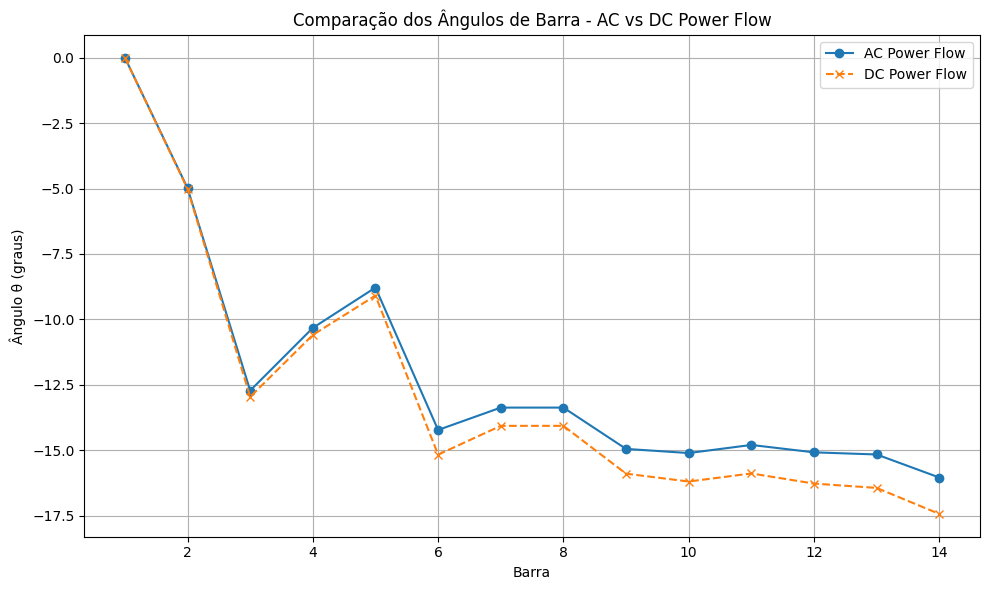

In [2]:
#AC Power Flow on IEEE 14-bus system
net = ieee14bus()
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from, flow_to = solver.get_line_flows()

#DC Power Flow on IEEE 14-bus system
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc =  solver.get_line_flows()

# Índice das barras (1, 2, 3, ...)
barras = np.arange(1, len(theta_ac) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(barras, theta_ac, marker='o', label='AC Power Flow')
plt.plot(barras, theta_dc, marker='x', linestyle='--', label='DC Power Flow')
plt.xlabel('Barra')
plt.ylabel('Ângulo θ (graus)')
plt.title('Comparação dos Ângulos de Barra - AC vs DC Power Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Caso especial: Rede DC usando CTDFs

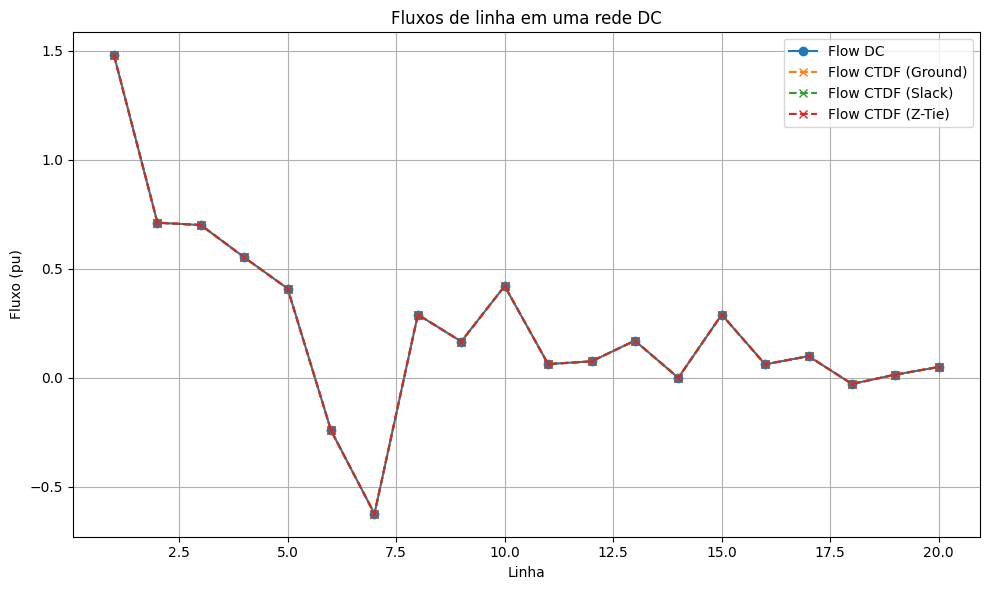

In [3]:
net = ieee14bus()
net.ACtoDC()

# Cálculo dos índices CTDF e flows
P = [net.buses[i].p for i in range(len(net.buses))]

# CTDF ground:
T_ground = net.CTDF()
flow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = net.CTDF(ref_bus=net.buses[0])
flow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = net.CTDF(ref_bus=net.buses[0], z_tie=1j)
flow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
#plt.plot(linhas, flow_ac, marker='o', label='Flow AC')
plt.plot(linhas, flow_dc, marker='o', label='Flow DC')
plt.plot(linhas, flow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, flow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, flow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Fluxos de linha em uma rede DC')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Rede completa AC: Aumento de carga de 10%

In [4]:
#AC Power Flow on IEEE 14-bus system
net = ieee14bus()
for load in net.loads:
    load.p_input = 1.1 * load.p_input  # Aumentando a carga em 10%

solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from_B, flow_to_B = solver.get_line_flows()
dflow_from  = flow_from_B - flow_from
dflow_to    = flow_to_B - flow_to

#DC Power Flow on IEEE 14-bus system
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc_B =  solver.get_line_flows()
dflow_dc = flow_dc_B - flow_dc

Converged in 3 iterations.


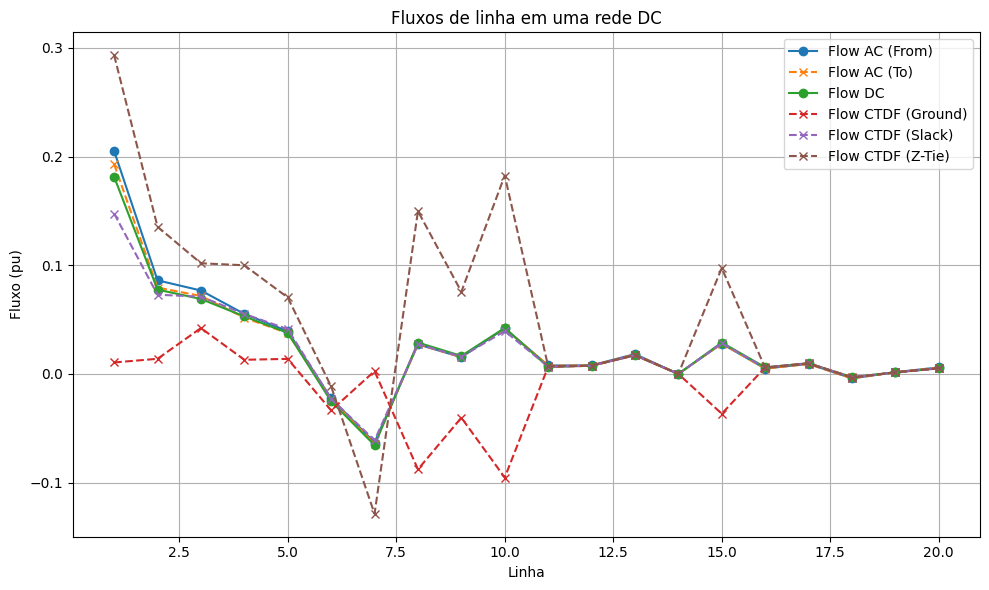

In [5]:
net = ieee14bus()

# Cálculo dos índices CTDF e flows
P = np.array([net.buses[i].p for i in range(len(net.buses))])
P = P * 0.1 # Perturbação de 10% na potência ativa

# CTDF ground:
T_ground = net.CTDF()
dflow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = net.CTDF(ref_bus=net.buses[0])
dflow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = net.CTDF(ref_bus=net.buses[0], z_tie=1j)
dflow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, dflow_from, marker='o', label='Flow AC (From)')
plt.plot(linhas, -dflow_to, marker='x', linestyle='--', label='Flow AC (To)')
plt.plot(linhas, dflow_dc, marker='o', label='Flow DC')
plt.plot(linhas, dflow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, dflow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, dflow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Fluxos de linha em uma rede DC')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6bus
Vamos conduzir testes no sistema 6 barras da seguinte forma:

1) Faremos um gráfico mostrando a diferença dos angulos thetas na formulação DC e AC

2) Faremos um gráfico calculando os fluxos através dos CTDFs diante do caso especial na rede DC e comparar com os fluxos DC

3) Faremos um gráfico e tabela comparando os fluxos calculados por CTDFs dado um aumento de carga no sistema e compararemos com os fluxos AC e DC

## Comparação thetas DC vs thetas AC

Converged in 4 iterations.


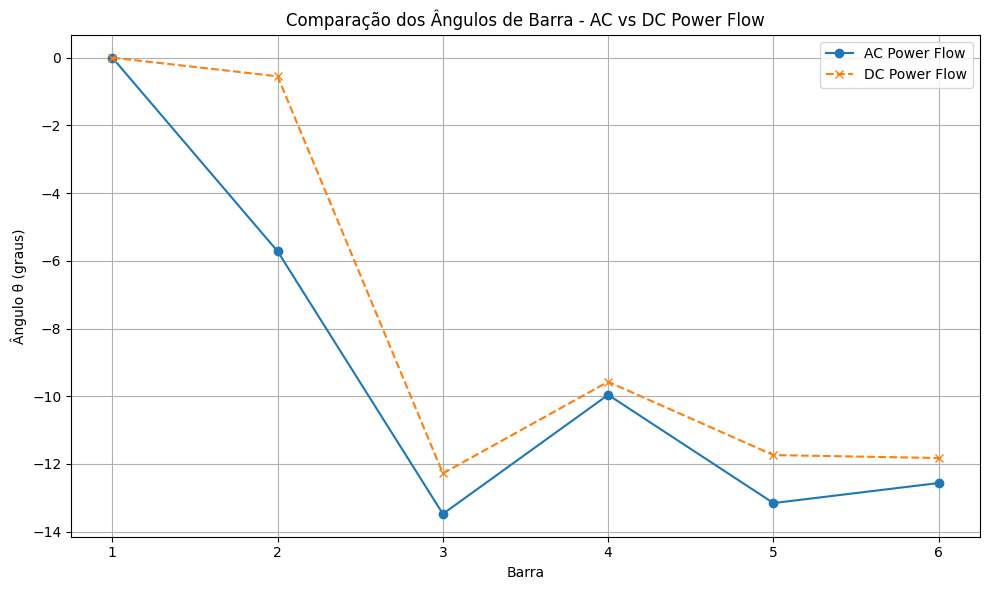

In [6]:
#AC Power Flow on IEEE 14-bus system
net = sauer6bus()
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from, flow_to = solver.get_line_flows()

#DC Power Flow on IEEE 14-bus system
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc =  solver.get_line_flows()

# Índice das barras (1, 2, 3, ...)
barras = np.arange(1, len(theta_ac) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(barras, theta_ac, marker='o', label='AC Power Flow')
plt.plot(barras, theta_dc, marker='x', linestyle='--', label='DC Power Flow')
plt.xlabel('Barra')
plt.ylabel('Ângulo θ (graus)')
plt.title('Comparação dos Ângulos de Barra - AC vs DC Power Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Caso especial: Rede DC usando CTDFs

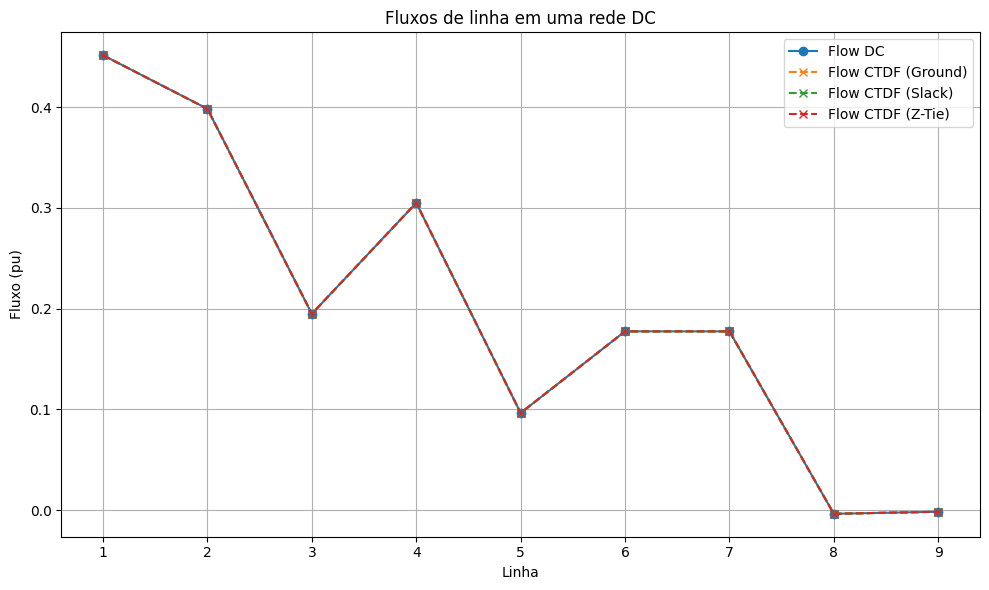

In [7]:
net = sauer6bus()
net.ACtoDC()

# Cálculo dos índices CTDF e flows
P = [net.buses[i].p for i in range(len(net.buses))]

# CTDF ground:
T_ground = net.CTDF()
flow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = net.CTDF(ref_bus=net.buses[0])
flow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = net.CTDF(ref_bus=net.buses[0], z_tie=1j)
flow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
#plt.plot(linhas, flow_ac, marker='o', label='Flow AC')
plt.plot(linhas, flow_dc, marker='o', label='Flow DC')
plt.plot(linhas, flow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, flow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, flow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Fluxos de linha em uma rede DC')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Rede Completa AC: Aumento de carga em 10%

In [8]:
#AC Power Flow on IEEE 14-bus system
net = sauer6bus()
for load in net.loads:
    load.p_input = 1.1 * load.p_input  # Aumentando a carga em 10%

solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from_B, flow_to_B = solver.get_line_flows()
dflow_from  = flow_from_B - flow_from
dflow_to    = flow_to_B - flow_to

#DC Power Flow on IEEE 14-bus system
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc_B =  solver.get_line_flows()
dflow_dc = flow_dc_B - flow_dc

Converged in 4 iterations.


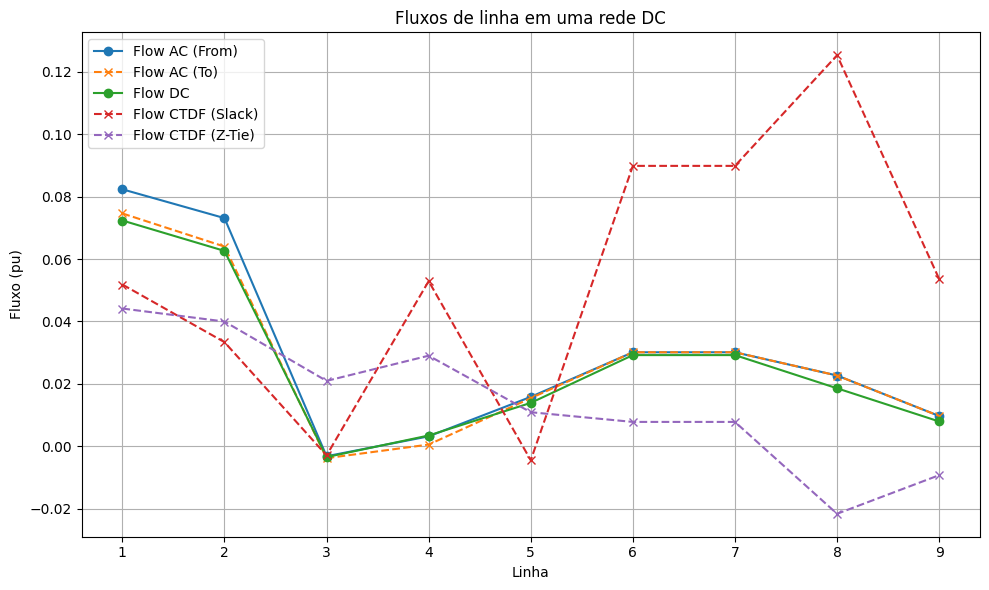

In [9]:
net = sauer6bus()

# Cálculo dos índices CTDF e flows
P = np.array([net.buses[i].p for i in range(len(net.buses))])
P = P * 0.1 # Perturbação de 10% na potência ativa

# CTDF ground:
T_ground = net.CTDF()
dflow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = net.CTDF(ref_bus=net.buses[0])
dflow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = net.CTDF(ref_bus=net.buses[0], z_tie=1j)
dflow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, dflow_from, marker='o', label='Flow AC (From)')
plt.plot(linhas, -dflow_to, marker='x', linestyle='--', label='Flow AC (To)')
plt.plot(linhas, dflow_dc, marker='o', label='Flow DC')
#plt.plot(linhas, dflow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, dflow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, dflow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Fluxos de linha em uma rede DC')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 11 Bus
Vamos conduzir testes no sistema 11 barras da seguinte forma:

1) Faremos um gráfico mostrando a diferença dos angulos thetas na formulação DC e AC

2) Faremos um gráfico calculando os fluxos através dos CTDFs diante do caso especial na rede DC e comparar com os fluxos DC

3) Faremos um gráfico e tabela comparando os fluxos calculados por CTDFs dado um aumento de carga no sistema e compararemos com os fluxos AC e DC

## Comparação thetas DC vs thetas AC

Converged in 4 iterations.


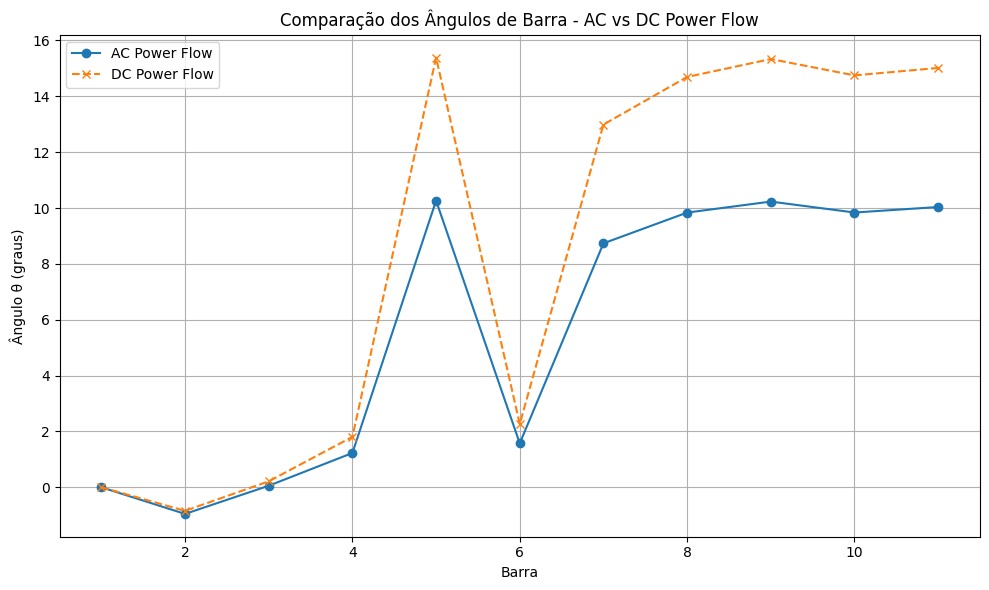

In [10]:
#AC Power Flow on IEEE 14-bus system
net = sauer11bus()
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from, flow_to = solver.get_line_flows()

#DC Power Flow on IEEE 14-bus system
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc =  solver.get_line_flows()

# Índice das barras (1, 2, 3, ...)
barras = np.arange(1, len(theta_ac) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(barras, theta_ac, marker='o', label='AC Power Flow')
plt.plot(barras, theta_dc, marker='x', linestyle='--', label='DC Power Flow')
plt.xlabel('Barra')
plt.ylabel('Ângulo θ (graus)')
plt.title('Comparação dos Ângulos de Barra - AC vs DC Power Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Caso especial: Rede DC usando CTDFs

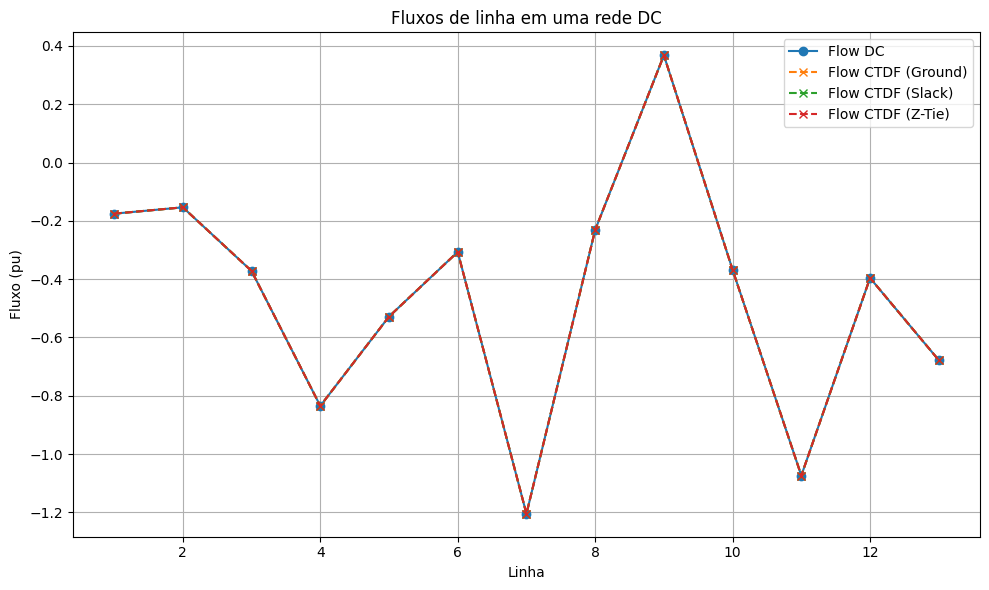

In [11]:
net = sauer11bus()
net.ACtoDC()

# Cálculo dos índices CTDF e flows
P = [net.buses[i].p for i in range(len(net.buses))]

# CTDF ground:
T_ground = net.CTDF()
flow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = net.CTDF(ref_bus=net.buses[0])
flow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = net.CTDF(ref_bus=net.buses[0], z_tie=1j)
flow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
#plt.plot(linhas, flow_ac, marker='o', label='Flow AC')
plt.plot(linhas, flow_dc, marker='o', label='Flow DC')
plt.plot(linhas, flow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, flow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, flow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Fluxos de linha em uma rede DC')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Rede Completa AC: Aumento de carga em 10%

In [12]:
#AC Power Flow on IEEE 14-bus system
net = sauer11bus()
for load in net.loads:
    load.p_input = 1.1 * load.p_input  # Aumentando a carga em 10%

solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from_B, flow_to_B = solver.get_line_flows()
dflow_from  = flow_from_B - flow_from
dflow_to    = flow_to_B - flow_to

#DC Power Flow on IEEE 14-bus system
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc_B =  solver.get_line_flows()
dflow_dc = flow_dc_B - flow_dc

Converged in 4 iterations.


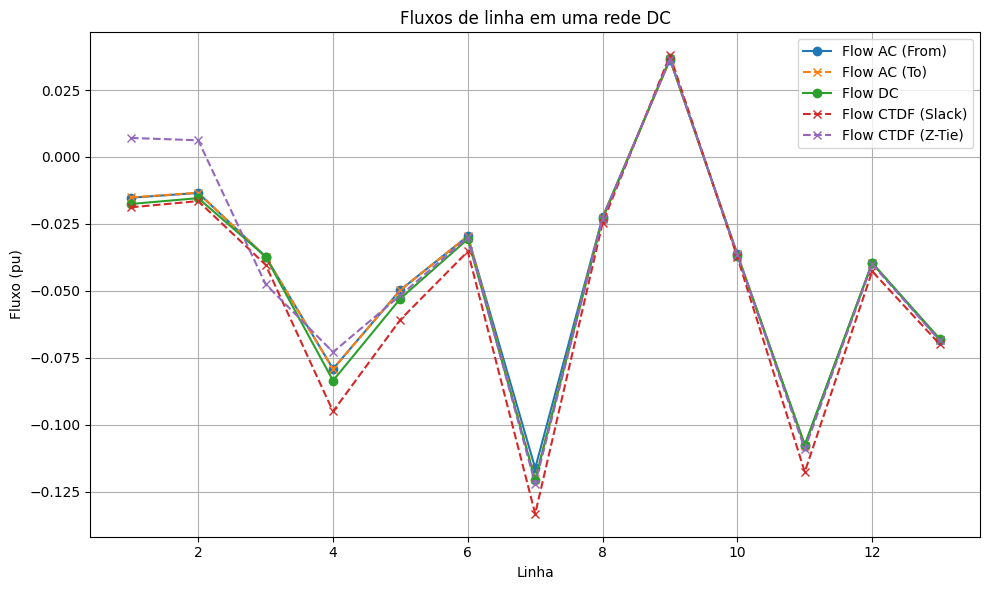

In [13]:
net = sauer11bus()

# Cálculo dos índices CTDF e flows
P = np.array([net.buses[i].p for i in range(len(net.buses))])
P = P * 0.1 # Perturbação de 10% na potência ativa

# CTDF ground:
T_ground = net.CTDF()
dflow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = net.CTDF(ref_bus=net.buses[0])
dflow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = net.CTDF(ref_bus=net.buses[0], z_tie=1j)
dflow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, dflow_from, marker='o', label='Flow AC (From)')
plt.plot(linhas, -dflow_to, marker='x', linestyle='--', label='Flow AC (To)')
plt.plot(linhas, dflow_dc, marker='o', label='Flow DC')
#plt.plot(linhas, dflow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, dflow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, dflow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Fluxos de linha em uma rede DC')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [14]:
x =2+2